# Load the libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## Access to Spotify API
This part sets up the Spotify API access by providing the client ID and client secret. It uses the SpotifyClientCredentials class from Spotipy to authenticate and create a Spotify client.

In [2]:
client_id = "8275ae5a64fc43dfa77675027d68c1df"
client_secret = "1ac1e6317aa840d5a50935ed1689535d" 

credmanager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credmanager)

# Demonstrating some features of Spotify API

This part demonstrates how to use the Spotify API to search for an artist, retrieve their information, and find related artists.

In [3]:
abdelhalim_search = sp.search('Abdel Halim Hafez', type='artist')['artists']['items'][0]
abdelhalim_search

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6IW026WCYU8L1WF79dfwss'},
 'followers': {'href': None, 'total': 1155248},
 'genres': ['classic arab pop'],
 'href': 'https://api.spotify.com/v1/artists/6IW026WCYU8L1WF79dfwss',
 'id': '6IW026WCYU8L1WF79dfwss',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb8a09ed6b6710081bace4da41',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051748a09ed6b6710081bace4da41',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1788a09ed6b6710081bace4da41',
   'width': 160}],
 'name': 'Abdel Halim Hafez',
 'popularity': 47,
 'type': 'artist',
 'uri': 'spotify:artist:6IW026WCYU8L1WF79dfwss'}

## Searching Abdel Halim Hafez

Performs a search for the artist "Abdel Halim Hafez" using the sp.search function and retrieves the search results. It then extracts important features of the artist, such as name, ID, popularity, genre, and number of followers.

In [4]:
def artist_features(spotify_search_result):
    result = {
        'artist_name': spotify_search_result.get('name', 'artist_name_not_available'),
        'artist_id': spotify_search_result.get('id', 'artist_id_not_available'),
        'artist_popularity': spotify_search_result.get('popularity', 0),
        'artist_first_genre': (spotify_search_result.get('genres', ['genre_not_available']) + ['genre_not_available'])[0],
        'artist_n_followers': spotify_search_result.get('followers', {}).get('total', 0)
    }
    return result

In [5]:
abdelhalim_features = artist_features(abdelhalim_search)
abdelhalim_features

{'artist_name': 'Abdel Halim Hafez',
 'artist_id': '6IW026WCYU8L1WF79dfwss',
 'artist_popularity': 47,
 'artist_first_genre': 'classic arab pop',
 'artist_n_followers': 1155248}

## Retrieving related artists

It retrieves the related artists of Abdel Halim Hafez using the sp.artist_related_artists function. It prints the number of related artists and displays some information about the first 20 related artists.

In [6]:
abdelhalim_related_artists = sp.artist_related_artists(abdelhalim_features['artist_id'])['artists']

print('Abdel Halim Hafez has', len(abdelhalim_related_artists), 'related artists. The first one is {abdelhalim_related_artists[0][artist_name]}.\n')

for i in range(20):
    print(artist_features(abdelhalim_related_artists[i]))

Abdel Halim Hafez has 20 related artists. The first one is {abdelhalim_related_artists[0][artist_name]}.

{'artist_name': 'George Wassouf', 'artist_id': '7Ddov9nbJDbpgzvBVb7cU1', 'artist_popularity': 49, 'artist_first_genre': 'arab pop', 'artist_n_followers': 1746793}
{'artist_name': 'Samira Said', 'artist_id': '5zHWEsVHtXWQRxPqwJdUYD', 'artist_popularity': 39, 'artist_first_genre': 'arab pop', 'artist_n_followers': 999516}
{'artist_name': 'Angham', 'artist_id': '0IiR4LJwslf6HBSdk9W3Dg', 'artist_popularity': 48, 'artist_first_genre': 'arab pop', 'artist_n_followers': 1468009}
{'artist_name': 'Elissa', 'artist_id': '68rvMwPL0yMbYR5cv0pzCR', 'artist_popularity': 54, 'artist_first_genre': 'arab pop', 'artist_n_followers': 3083701}
{'artist_name': 'Fadel Chaker', 'artist_id': '1LljnS3oumQ36wdBhkPKrs', 'artist_popularity': 49, 'artist_first_genre': 'arab pop', 'artist_n_followers': 1517222}
{'artist_name': 'Wael Jassar', 'artist_id': '5HczG7gdd89oDKY0CUyPof', 'artist_popularity': 52, 'artis

Every artist on Spotify has only 20 related artists.

# Create a graph

This part demonstrates how to create a graph representation using the networkx library. It creates an empty undirected graph and sets a popularity threshold. It adds initial nodes to the graph based on a list of artist names stored in a file.

In [7]:
G = nx.Graph() # create an empty graph

popularity_threshold = 80 # if an artist have a lower popularity, it won't be in our graph.

## Add some initial nodes to the graph

It reads the artist names from a file and searches for each artist using the Spotify API. If the artist is sufficiently popular (above the popularity threshold), it adds the artist as a node to the graph, with attributes representing the artist's features.

In [10]:
with open('artists.txt', 'r', encoding='utf-8') as file:
    artists_name_list = file.read().splitlines()

print('There are', len(artists_name_list), 'artists in the initial list.')

There are 4530 artists in the initial list.


In [16]:
not_popular = 0
for name in artists_name_list:
    if name.strip() == "":
        continue
    try:
        search_results = sp.search(name, type='artist')['artists']['items']
        if search_results:
            search = search_results[0]
            this_artist = artist_features(search)
            if this_artist['artist_popularity'] >= popularity_threshold:
                G.add_node(this_artist['artist_name'], **this_artist, related_found=False)
            else:
                not_popular+=1
                clear_output(wait=True)
                print(name, 'is not a popular artist, we do not add it to our graph.')
                print(f"there are {not_popular} nonpopular artists")
        else:
            print(name, 'could not be found.')
    except spotipy.SpotifyException as e:
        print("An error occurred while searching for", name)
        print("Error message:", str(e))
        print(f"there are {not_popular} nonpopular artists")

Hani Mitwasi is not a popular artist, we do not add it to our graph.
there are 4380 nonpopular artists


## Adding edges and more nodes to the graph

This part iterates through the nodes in the graph and finds their related artists, adding them as nodes and creating edges between the artists. The process continues until there are no new artists to add or the number of artists in the graph exceeds 1000.

In [18]:
dummy = 0

while dummy == 0:
    l = len(G)  # number of nodes in the graph currently
    num_edges = len(G.edges)  # number of edges in the graph currently
    
    for x in list(G):  # iterate each node
        if G.nodes[x]['related_found'] == False:  # then we need to find its related artists
            relateds = sp.artist_related_artists(G.nodes[x]['artist_id'])['artists']
            relateds = [artist_features(r) for r in relateds]
            relateds_names = [r['artist_name'] for r in relateds]
            G.nodes[x]['related_found'] = True  # it was False, but now we found its related artists
            
            for rname, rdict in zip(relateds_names, relateds):
                if rdict['artist_popularity'] >= popularity_threshold:
                    
                    if rname in G:  # node already in G
                        pass  # do nothing
                    
                    else:
                        G.add_node(rname, **rdict, related_found=False)  # we added a new node, we don't know its relateds yet
                        clear_output(wait=True)
                        print('The graph has', len(G), 'nodes now.')
                        
                    G.add_edge(x, rname)  # we add an edge between x and its related rname
    
    if len(G) == l or len(G) > 1000:  # number of nodes didn't change or graph grew too large
        dummy = 1  # break the while loop
        print('Done.')
    
    num_new_edges = len(G.edges) - num_edges
    print('Number of edges:', num_new_edges)

Done.
Number of edges: 0


# Analysis and Visualization

This part performs analysis on the created graph, including finding the number of connected components and plotting the degree distribution. It also visualizes the graph using the nx.draw_networkx function from the networkx library.

In [19]:
# connected components
n_connected = nx.number_connected_components(G)
print('The graph has', n_connected, 'connected components.')

The graph has 26 connected components.


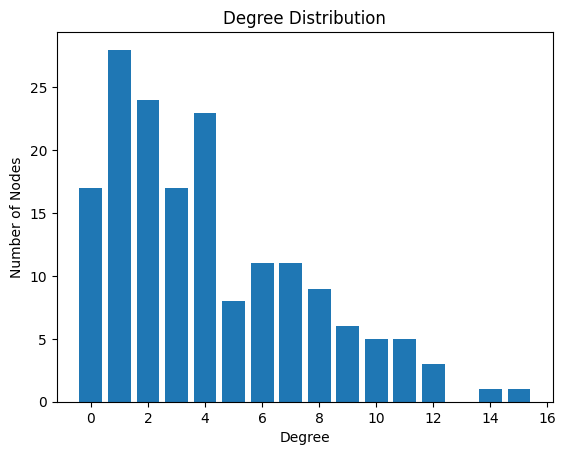

In [20]:
degree_hist = nx.degree_histogram(G)

degrees = range(len(degree_hist))
counts = degree_hist

plt.bar(degrees, counts)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.show()


By looking at the table, we can say that more than 800 nodes had a degree (number of neighbors) of exactly 3.

Also, there are 1 nodes with degree 69 and 2 nodes with degree 51.

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


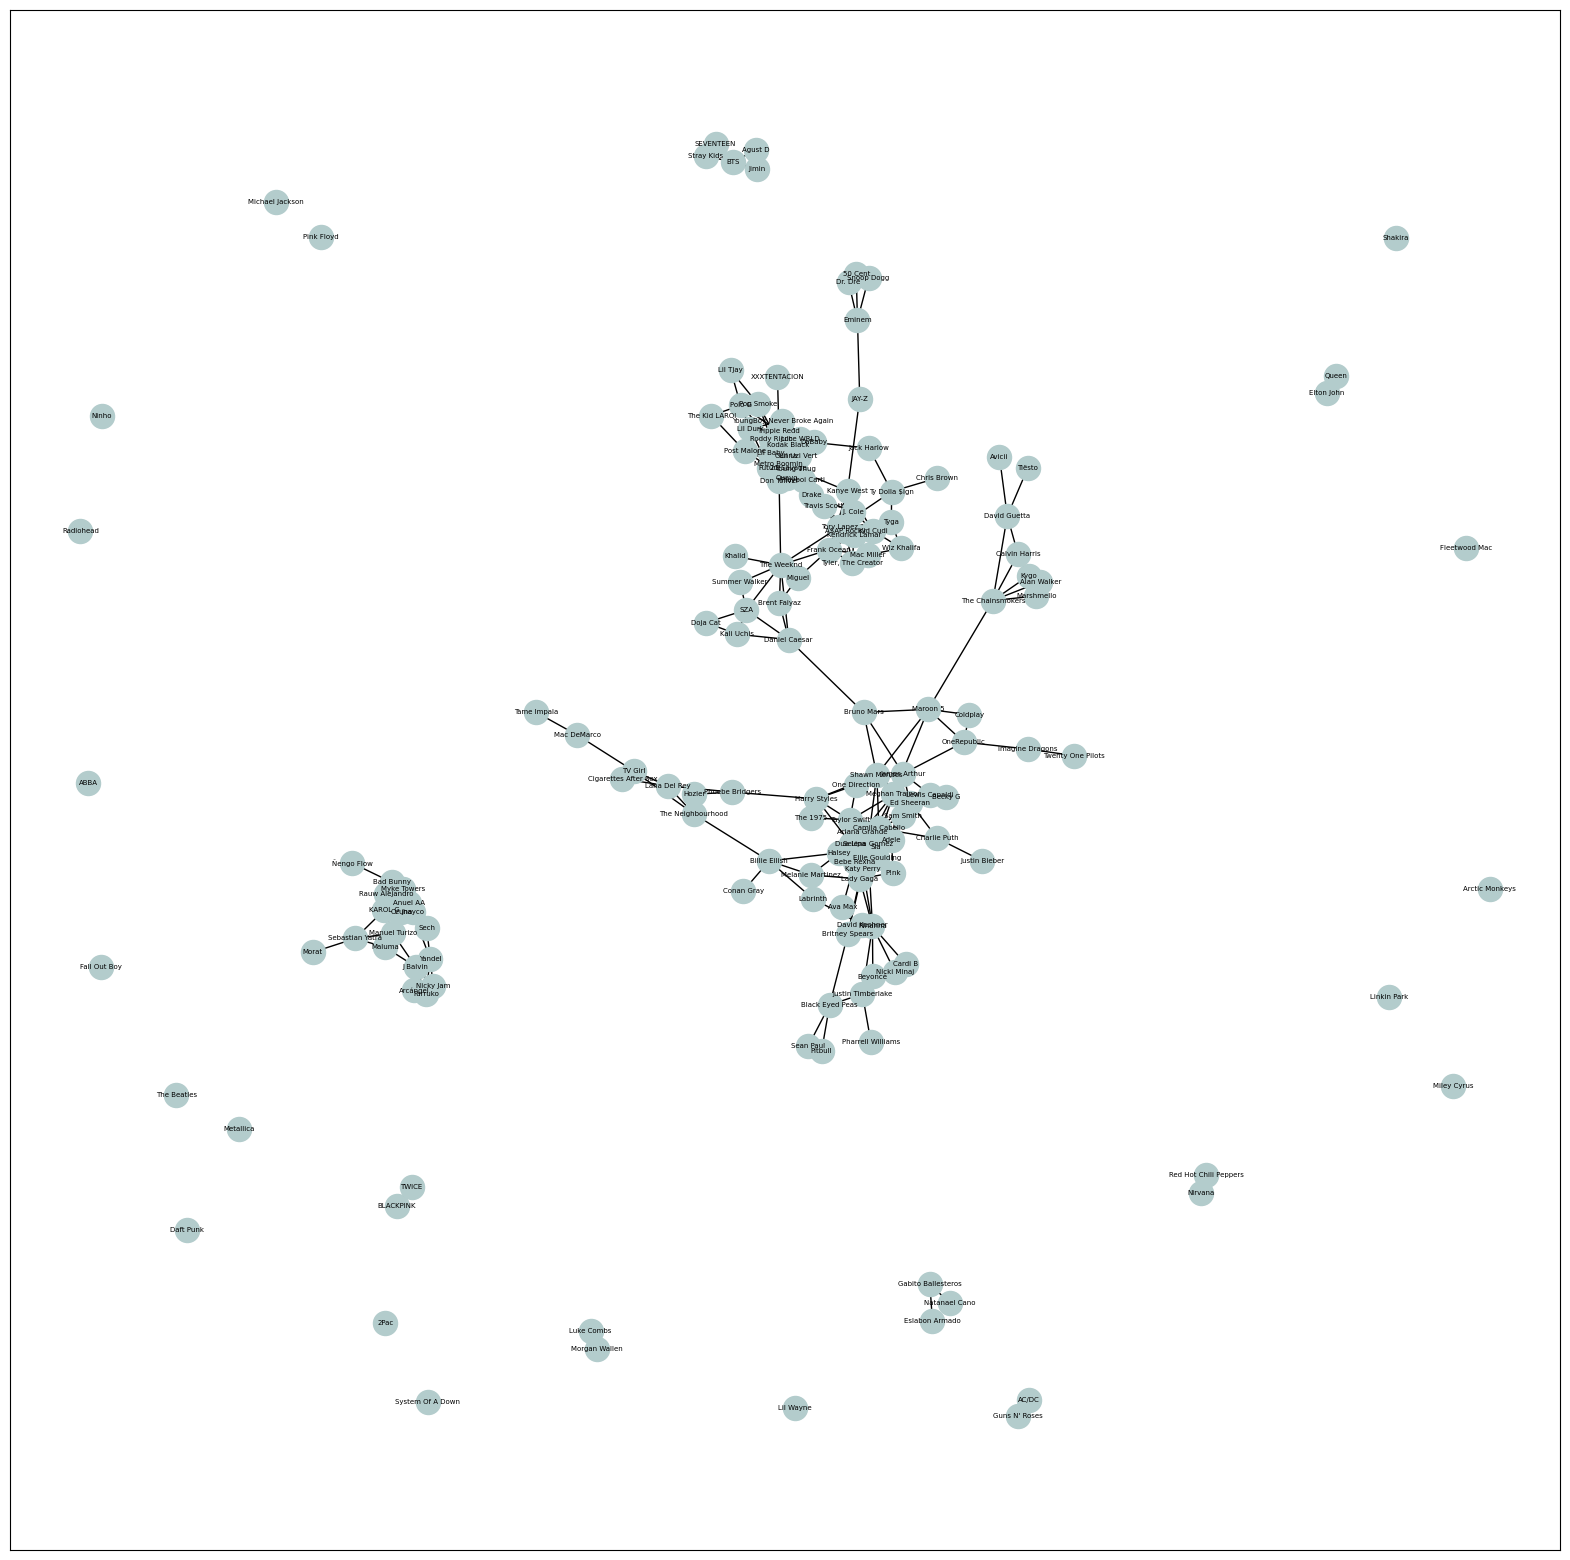

In [22]:
np.random.seed(0)
plt.figure(figsize=(20,20))
nx.draw_networkx(G, with_labels=True, node_color=(.7,.8,.8), font_size=5)